In [17]:
class Person():
    def __init__(self, name, surname, dates, pic, tags, network):
        self.name = name
        self.surname = surname
        self.dates = dates
        self.pic = pic
        self.tags = tags
        self.network = network
        
    def add_relation(self,ID_rel,relation):
        
        if ID_rel not in self.network:
            self.network[ID_rel] = relation
        else:
            raise ValueError(f"You already have a relation with {ID_rel.name}")
        

class Relation():
    def __init__(self, nickname, chats={}, photos={}):
        self.nickname = nickname
        self.chats = chats
        self.photos = photos
        

michifrost = Person("Michele","Morella", {"Birthday": "17/07/1996", "Anniversary":"25/08"},pic = None, tags = ["#boyfriend"],network = {})
francigrofi = Person("Francesco","Scipione", {"Birthday": "10/02/1993", "Anniversary":"25/08"},pic = None, tags = ["#boyfriend"],network = {})

michifrost.add_relation(francigrofi.name,Relation("Grofi"))
print(michifrost.network.keys())

dict_keys(['Francesco'])


In [30]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [31]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [32]:
data = []
conversation = 'WhatsAppChatMichele.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

/tmp/ipykernel_111101/1358540779.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


array([[<Axes: title={'center': 'Date'}>]], dtype=object)

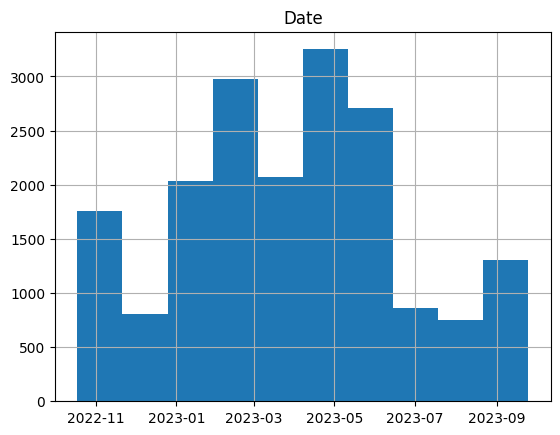

In [37]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
df.hist()

AttributeError: partially initialized module 'kivy' has no attribute 'deps' (most likely due to a circular import)